<a href="https://colab.research.google.com/github/kennfarr/Final-Project/blob/main/tweet_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [3]:
#for kamala analysis use /content/tweet_trump.csv
#for trump analysis use /content/tweet_kamala.csv
df = pd.read_csv('/content/tweet_trump.csv')

In [4]:
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1833973370460815785,Wed Sep 11 20:58:19 +0000 2024,288,TRUMP 2024 🇺🇸🇺🇸 @LadyConstance8 @NancyMar2022 ...,1833973370460815785,https://pbs.twimg.com/media/GXOVD0cXYAAl3D_.jpg,NaN,en,NaN,6,47,168,https://x.com/Langer424/status/183397337046081...,1521692036897902592,Langer424
1,1840195818198052940,Sun Sep 29 01:04:06 +0000 2024,345,⭐️ The 𝘈𝘮𝘦𝘳𝘪𝘤𝘢𝘯 𝘴𝘱𝘪𝘳𝘪𝘵 𝘪𝘴 𝙂𝙍𝙀𝘼𝙏! ⭐️ 𝘈𝘮𝘦𝘳𝘪𝘤𝘢𝘯 𝘤...,1840195818198052940,https://pbs.twimg.com/amplify_video_thumb/1840...,NaN,en,The Great Lakes State,4,6,238,https://x.com/1776Diva/status/1840195818198052940,1343367645748473856,1776Diva
2,1836786753765519766,Thu Sep 19 15:17:42 +0000 2024,4464,Recent Poll shows Donald Trump WINNING IN A LA...,1836786753765519766,https://pbs.twimg.com/media/GX2TzpvX0AADuiW.jpg,NaN,en,India🇮🇳,44,1218,816,https://x.com/SUBRATA30016572/status/183678675...,1142736007567069184,SUBRATA30016572
3,1850662507481792623,Sun Oct 27 22:15:26 +0000 2024,723,@realDonaldTrump With Trump in 2024? Here s a ...,1850662617917858188,https://pbs.twimg.com/media/Ga7f13qWcAEgvoP.jpg,realDonaldTrump,en,NaN,4,67,97,https://x.com/TuckerCarlsonHQ/status/185066261...,1755191109574107136,TuckerCarlsonHQ
4,1847203688097407237,Fri Oct 18 09:10:53 +0000 2024,494,NOW more than EVER MAGA 🇺🇸 TRUMP 2024 https://...,1847203688097407237,https://pbs.twimg.com/media/GaKV9p7XgAAaeJF.jpg,NaN,en,NaN,1,25,212,https://x.com/DameScorpio/status/1847203688097...,1551523351843192834,DameScorpio


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      545 non-null    int64 
 1   created_at               545 non-null    object
 2   favorite_count           545 non-null    int64 
 3   full_text                545 non-null    object
 4   id_str                   545 non-null    int64 
 5   image_url                389 non-null    object
 6   in_reply_to_screen_name  46 non-null     object
 7   lang                     545 non-null    object
 8   location                 386 non-null    object
 9   quote_count              545 non-null    int64 
 10  reply_count              545 non-null    int64 
 11  retweet_count            545 non-null    int64 
 12  tweet_url                545 non-null    object
 13  user_id_str              545 non-null    int64 
 14  username                 545 non-null    o

**Data Processing**

In [6]:
df['created_at'] = df['created_at'].apply(lambda x: dt.datetime.strptime(x, '%a %b %d %H:%M:%S %z %Y'))

In [7]:
df.dtypes

,0
conversation_id_str,int64
created_at,"datetime64[ns, UTC]"
favorite_count,int64
full_text,object
id_str,int64
image_url,object
in_reply_to_screen_name,object
lang,object
location,object
quote_count,int64


In [8]:
df.isnull().sum()

,0
conversation_id_str,0
created_at,0
favorite_count,0
full_text,0
id_str,0
image_url,156
in_reply_to_screen_name,499
lang,0
location,159
quote_count,0


In [9]:
df['location'].nunique()

199

**Removing Duplicates**

In [10]:
tweets_list = df['full_text'].tolist()
len(tweets_list)

545

In [11]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)

490

In [12]:
df['full_text'].duplicated().sum()

55

In [13]:
df = df.drop_duplicates(subset = 'full_text', keep = 'first',ignore_index = True)
df.shape

(490, 15)

**Removing Emojis**

In [14]:
import re

def remove_emoji(full_text):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    # Changed 'tweet' to 'full_text' to use the correct column name
    return emoji_pattern.sub(r'', full_text)

# Changed 'Tweet' to 'full_text' to apply the function to the correct column
df['Processed_Tweet'] = df['full_text'].apply(remove_emoji)

<ipython-input-14-f20a2cc0c35c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processed_Tweet'] = df['full_text'].apply(remove_emoji)


In [15]:
count = 0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1

count

0

In [16]:

df.shape

(490, 16)

In [17]:
df['Processed_Tweet']

,Processed_Tweet
0,TRUMP 2024 @LadyConstance8 @NancyMar2022 @cal...
1,⭐️ The 𝘈𝘮𝘦𝘳𝘪𝘤𝘢𝘯 𝘴𝘱𝘪𝘳𝘪𝘵 𝘪𝘴 𝙂𝙍𝙀𝘼𝙏! ⭐️ 𝘈𝘮𝘦𝘳𝘪𝘤𝘢𝘯 𝘤...
2,Recent Poll shows Donald Trump WINNING IN A LA...
3,@realDonaldTrump With Trump in 2024? Here s a ...
4,NOW more than EVER MAGA TRUMP 2024 https://t....
...,...
485,Note from WNEP: Test results for the upcoming ...
486,.@Polymarket - 2024 Presidential Election Winn...
487,.@Polymarket - 2024 Presidential Election Winn...
488,#Detroit | Kamala Harris and Donald Trump make...


**Removing Emojis**

In [18]:
df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]

In [19]:
df['Processed_Tweet']

,Processed_Tweet
0,TRUMP 2024 @LadyConstance8 @NancyMar2022 @cal...
1,⭐️ The 𝘈𝘮𝘦𝘳𝘪𝘤𝘢𝘯 𝘴𝘱𝘪𝘳𝘪𝘵 𝘪𝘴 𝙂𝙍𝙀𝘼𝙏! ⭐️ 𝘈𝘮𝘦𝘳𝘪𝘤𝘢𝘯 𝘤...
2,Recent Poll shows Donald Trump WINNING IN A LA...
3,@realDonaldTrump With Trump in 2024? Here s a ...
4,NOW more than EVER MAGA TRUMP 2024 https://t....
...,...
485,Note from WNEP: Test results for the upcoming ...
486,.@Polymarket - 2024 Presidential Election Winn...
487,.@Polymarket - 2024 Presidential Election Winn...
488,#Detroit | Kamala Harris and Donald Trump make...


**Removing URLs**

In [20]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']]

In [21]:

df['Processed_Tweet']

,Processed_Tweet
0,TRUMP 2024 @LadyConstance8 @NancyMar2022 @cal...
1,⭐️ The 𝘈𝘮𝘦𝘳𝘪𝘤𝘢𝘯 𝘴𝘱𝘪𝘳𝘪𝘵 𝘪𝘴 𝙂𝙍𝙀𝘼𝙏! ⭐️ 𝘈𝘮𝘦𝘳𝘪𝘤𝘢𝘯 𝘤...
2,Recent Poll shows Donald Trump WINNING IN A LA...
3,@realDonaldTrump With Trump in 2024? Here s a ...
4,NOW more than EVER MAGA TRUMP 2024
...,...
485,Note from WNEP: Test results for the upcoming ...
486,.@Polymarket - 2024 Presidential Election Winn...
487,.@Polymarket - 2024 Presidential Election Winn...
488,#Detroit | Kamala Harris and Donald Trump make...


**Removing #**

In [22]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']]

In [23]:
df['Processed_Tweet']

,Processed_Tweet
0,TRUMP 2024 @LadyConstance8 @NancyMar2022 @cal...
1,⭐️ The 𝘈𝘮𝘦𝘳𝘪𝘤𝘢𝘯 𝘴𝘱𝘪𝘳𝘪𝘵 𝘪𝘴 𝙂𝙍𝙀𝘼𝙏! ⭐️ 𝘈𝘮𝘦𝘳𝘪𝘤𝘢𝘯 𝘤...
2,Recent Poll shows Donald Trump WINNING IN A LA...
3,@realDonaldTrump With Trump in 2024? Here s a ...
4,NOW more than EVER MAGA TRUMP 2024
...,...
485,Note from WNEP: Test results for the upcoming ...
486,.@Polymarket - 2024 Presidential Election Winn...
487,.@Polymarket - 2024 Presidential Election Winn...
488,Detroit | Kamala Harris and Donald Trump make ...


**Using preprocessor library**

In [24]:
!pip install tweet-preprocessor

In [25]:
import preprocessor as p

In [26]:
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]

In [27]:
df['Processed_Tweet']

,Processed_Tweet
0,TRUMP
1,The ! ! ! ! !
2,Recent Poll shows Donald Trump WINNING IN A LA...
3,With Trump in ? Here s a follow-back!
4,NOW more than EVER MAGA TRUMP
...,...
485,Note from WNEP: Test results for the upcoming ...
486,. - Presidential Election Winner: Donald Trump...
487,. - Presidential Election Winner: Donald Trump...
488,Detroit | Kamala Harris and Donald Trump make ...


**Removing numbers, puntuations and special characters**

In [28]:
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")

In [29]:
df["Processed_Tweet"]

,Processed_Tweet
0,TRUMP
1,The ! ! ! ! !
2,Recent Poll shows Donald Trump WINNING IN A LA...
3,With Trump in ? Here s a follow-back!
4,NOW more than EVER MAGA TRUMP
...,...
485,Note from WNEP: Test results for the upcoming ...
486,. - Presidential Election Winner: Donald Trump...
487,. - Presidential Election Winner: Donald Trump...
488,Detroit | Kamala Harris and Donald Trump make ...


**Converting tweets into lowercase**

In [30]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet]

In [31]:
df["Processed_Tweet"]

,Processed_Tweet
0,trump
1,the ! ! ! ! !
2,recent poll shows donald trump winning in a la...
3,with trump in ? here s a follow-back!
4,now more than ever maga trump
...,...
485,note from wnep: test results for the upcoming ...
486,. - presidential election winner: donald trump...
487,. - presidential election winner: donald trump...
488,detroit | kamala harris and donald trump make ...


**Removing stop words**

In [32]:
!pip install nltk # Install the NLTK library if not already installed.
import nltk
nltk.download('stopwords') # Download the 'stopwords' dataset.
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [33]:
stop_words = set(stopwords.words('english'))
stop_words = list(stop_words)
print(stop_words)

['this', 'their', "should've", 'be', 'then', "hasn't", 'our', 'both', "haven't", 'not', 'which', 'as', 'shouldn', 'off', 'where', 'here', 'few', 'she', 'wouldn', 'can', "shan't", 'himself', 'myself', 'should', 'in', "wasn't", "couldn't", "mustn't", 'am', 'under', 'now', 'some', 's', 'hasn', 'into', 'yours', 'each', 'of', 'to', 'her', 'ours', 'while', 'any', 'after', 'they', "you'd", 'mightn', 'ma', 'herself', 'll', "don't", 'themselves', "you're", 'down', 'own', 'theirs', 'very', 'because', 'about', 'at', 'we', 'until', "you've", 'd', "doesn't", "you'll", 'does', 'it', 'isn', 'did', 'them', 'an', 'all', 'during', 'other', 'out', 'on', 'i', 'yourself', 'against', 'wasn', "weren't", 'were', 'over', 'doing', 'haven', "mightn't", "wouldn't", 'been', 'those', 'ourselves', "isn't", 'further', 'was', 'have', 'such', 'itself', 'the', 'if', 'there', 'couldn', 'so', 'with', 'needn', 'before', "she's", 'below', 'whom', 'hadn', 'is', 't', 'too', 'y', 'won', 'had', "aren't", 'up', "needn't", 'ain',

In [34]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))

In [35]:
df['Processed_Tweet']

,Processed_Tweet
0,trump
1,! ! ! ! !
2,recent poll shows donald trump winning landsli...
3,trump ? follow-back!
4,ever maga trump
...,...
485,note wnep: test results upcoming november gene...
486,. - presidential election winner: donald trump...
487,. - presidential election winner: donald trump...
488,detroit | kamala harris donald trump make fina...


**Tokenization**

In [36]:
!pip install nltk transformers
import nltk
from nltk.tokenize import word_tokenize
from transformers import AutoTokenizer

# Download necessary resources for NLTK if not already present
nltk.download('punkt')

#Choose a model checkpoint from huggingface and instantiate the tokenizer.
# Replace "bert-base-uncased" with the desired pre-trained model.
model_checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [37]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))

In [38]:
df['Processed_Tweet']

,Processed_Tweet
0,[trump]
1,"[!, !, !, !, !]"
2,"[recent, poll, shows, donald, trump, winning, ..."
3,"[trump, ?, follow, -, back, !]"
4,"[ever, mag, ##a, trump]"
...,...
485,"[note, w, ##ne, ##p, :, test, results, upcomin..."
486,"[., -, presidential, election, winner, :, dona..."
487,"[., -, presidential, election, winner, :, dona..."
488,"[detroit, |, kamal, ##a, harris, donald, trump..."


**Stemming**

In [39]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)

In [40]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x])

In [41]:
df['Processed_Tweet']

,Processed_Tweet
0,[trump]
1,"[!, !, !, !, !]"
2,"[recent, poll, show, donald, trump, win, lands..."
3,"[trump, ?, follow, -, back, !]"
4,"[ever, mag, ##a, trump]"
...,...
485,"[note, w, ##ne, ##p, :, test, result, upcom, n..."
486,"[., -, presidenti, elect, winner, :, donald, t..."
487,"[., -, presidenti, elect, winner, :, donald, t..."
488,"[detroit, |, kamal, ##a, harri, donald, trump,..."


In [42]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])

In [43]:
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,Processed_Tweet
0,1833973370460815785,2024-09-11 20:58:19+00:00,288,TRUMP 2024 🇺🇸🇺🇸 @LadyConstance8 @NancyMar2022 ...,1833973370460815785,https://pbs.twimg.com/media/GXOVD0cXYAAl3D_.jpg,NaN,en,NaN,6,47,168,https://x.com/Langer424/status/183397337046081...,1521692036897902592,Langer424,[trump]
1,1840195818198052940,2024-09-29 01:04:06+00:00,345,⭐️ The 𝘈𝘮𝘦𝘳𝘪𝘤𝘢𝘯 𝘴𝘱𝘪𝘳𝘪𝘵 𝘪𝘴 𝙂𝙍𝙀𝘼𝙏! ⭐️ 𝘈𝘮𝘦𝘳𝘪𝘤𝘢𝘯 𝘤...,1840195818198052940,https://pbs.twimg.com/amplify_video_thumb/1840...,NaN,en,The Great Lakes State,4,6,238,https://x.com/1776Diva/status/1840195818198052940,1343367645748473856,1776Diva,[]
2,1836786753765519766,2024-09-19 15:17:42+00:00,4464,Recent Poll shows Donald Trump WINNING IN A LA...,1836786753765519766,https://pbs.twimg.com/media/GX2TzpvX0AADuiW.jpg,NaN,en,India🇮🇳,44,1218,816,https://x.com/SUBRATA30016572/status/183678675...,1142736007567069184,SUBRATA30016572,"[recent, poll, show, donald, trump, win, lands..."
3,1850662507481792623,2024-10-27 22:15:26+00:00,723,@realDonaldTrump With Trump in 2024? Here s a ...,1850662617917858188,https://pbs.twimg.com/media/Ga7f13qWcAEgvoP.jpg,realDonaldTrump,en,NaN,4,67,97,https://x.com/TuckerCarlsonHQ/status/185066261...,1755191109574107136,TuckerCarlsonHQ,"[trump, follow, back]"
4,1847203688097407237,2024-10-18 09:10:53+00:00,494,NOW more than EVER MAGA 🇺🇸 TRUMP 2024 https://...,1847203688097407237,https://pbs.twimg.com/media/GaKV9p7XgAAaeJF.jpg,NaN,en,NaN,1,25,212,https://x.com/DameScorpio/status/1847203688097...,1551523351843192834,DameScorpio,"[ever, mag, ##a, trump]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,1851703707710136420,2024-10-30 19:12:21+00:00,2,Note from WNEP: Test results for the upcoming ...,1851703707710136420,NaN,NaN,en,Atlanta & Miami,0,0,0,https://x.com/AllAllatlanta/status/18517037077...,1571173375099166727,AllAllatlanta,"[note, ##ne, ##p, test, result, upcom, novemb,..."
486,1850666294829359390,2024-10-27 22:30:03+00:00,986,.@Polymarket - 2024 Presidential Election Winn...,1850666294829359390,https://pbs.twimg.com/media/Ga7jLxkXEAADgiL.jpg,NaN,en,NaN,14,64,162,https://x.com/Politics_Polls/status/1850666294...,1903105045,Politics_Polls,"[presidenti, elect, winner, donald, trump, kam..."
487,1851021689326645710,2024-10-28 22:02:15+00:00,641,.@Polymarket - 2024 Presidential Election Winn...,1851021689326645710,https://pbs.twimg.com/media/GbAmanRWwAApiEg.jpg,NaN,en,NaN,8,54,128,https://x.com/Politics_Polls/status/1851021689...,1903105045,Politics_Polls,"[presidenti, elect, winner, donald, trump, kam..."
488,1853166101871690034,2024-11-03 20:03:23+00:00,1,#Detroit | Kamala Harris and Donald Trump make...,1853166101871690034,NaN,NaN,en,"Hyderabad, India",0,0,1,https://x.com/DeccanChronicle/status/185316610...,19519947,DeccanChronicle,"[detroit, kamal, ##a, harri, donald, trump, ma..."


In [44]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )

In [45]:
all_words = []
for i in texts:
    all_words.append(" ".join(i))

In [46]:
text = []
for i in texts:
    for j in i:
        text.append(j)

In [47]:
len(text)

9661

**Wordcloud**

In [48]:
!pip install wordcloud
from wordcloud import WordCloud # Importing the WordCloud class from the wordcloud library.

In [49]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))


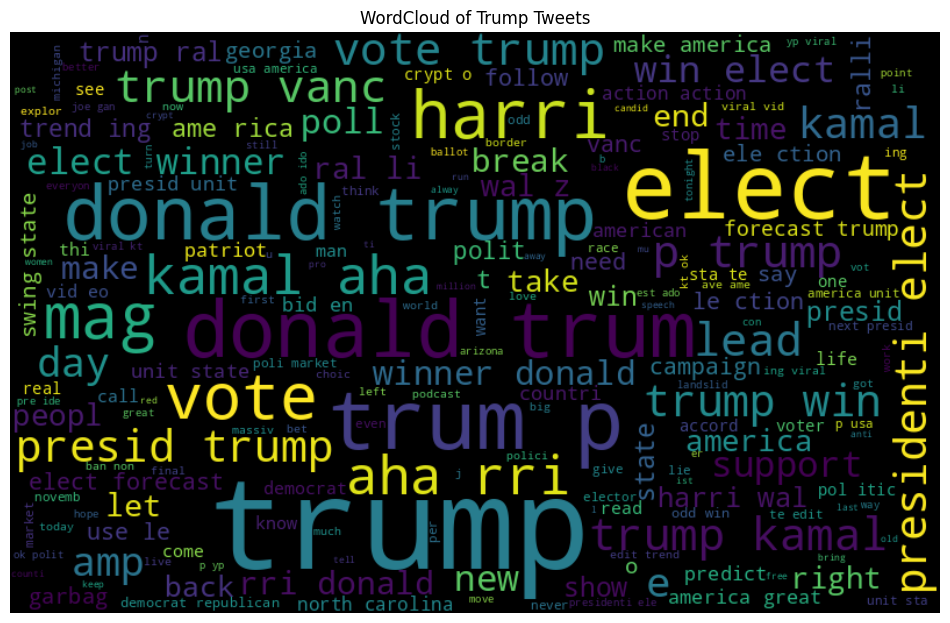

In [50]:
plt.figure(figsize = (12, 12), facecolor="None")
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Trump Tweets")
plt.show()

**Tweets Data Analysis**

In [51]:
df['username'].value_counts()

,count
username,
Politics_Polls,24
ElectionTime_,11
DanScavino,10
LauraLoomer,9
aladdinumar,9
...,...
MrDWindsorAndMe,1
PONY_Official,1
BackThebluecool,1


In [52]:
days = df['created_at'].dt.day.tolist()

In [53]:
no_of_days = Counter(days)
no_of_days

Counter({11: 8,
         29: 10,
         19: 6,
         27: 10,
         18: 13,
         16: 13,
         2: 17,
         30: 18,
         3: 189,
         22: 8,
         9: 7,
         28: 10,
         31: 26,
         10: 7,
         17: 8,
         14: 3,
         13: 6,
         1: 39,
         24: 12,
         6: 6,
         25: 12,
         20: 6,
         21: 9,
         15: 8,
         23: 7,
         7: 5,
         26: 10,
         8: 3,
         4: 10,
         5: 3,
         12: 1})

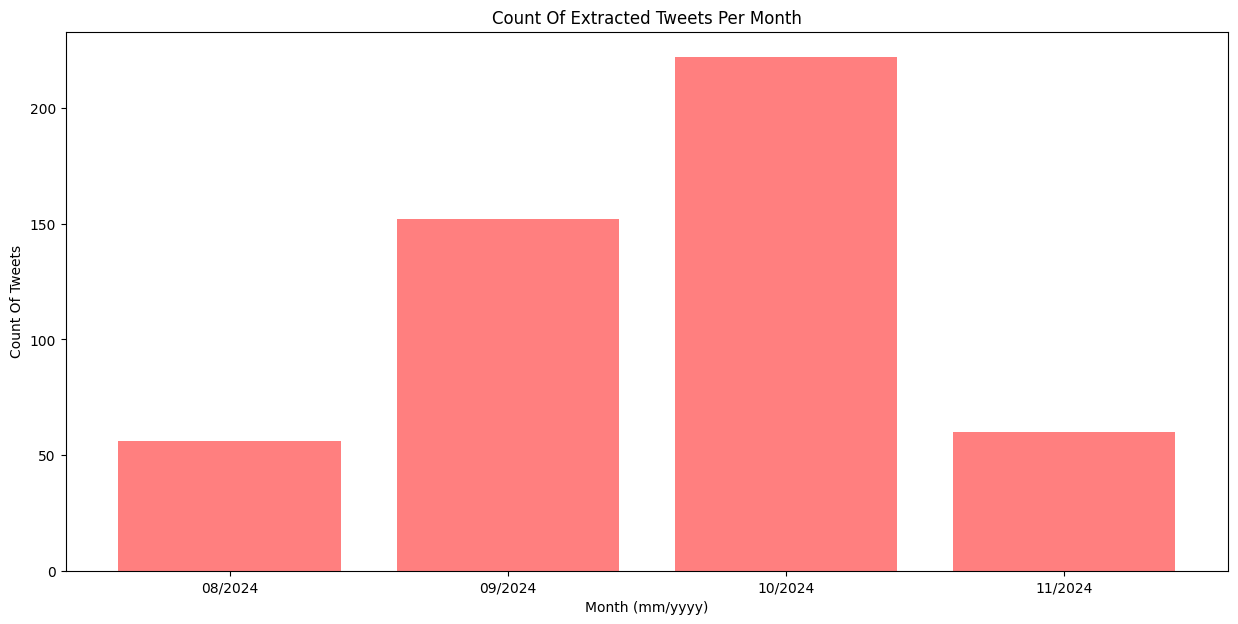

In [54]:
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict

# Example dictionary with daily data: Replace this with your actual data
no_of_days = Counter(days)


# Aggregate tweet counts by month
monthly_counts = defaultdict(int)
for date, count in no_of_days.items():
    # Extract the original date string from the 'created_at' column
    # (Assuming 'df' is your original DataFrame containing the 'created_at' column)
    original_date_str = df['created_at'].dt.strftime('%Y-%m-%d')[date]

    # Extract month and year (mm/yyyy format)
    month_year = datetime.strptime(original_date_str, "%Y-%m-%d").strftime("%m/%Y")
    monthly_counts[month_year] += count

# Sort months in chronological order
sorted_months = sorted(monthly_counts.keys(), key=lambda x: datetime.strptime(x, "%m/%Y"))

# Prepare x-axis labels and tweet counts
months = sorted_months
tweet_counts = [monthly_counts[month] for month in months]

# Create the bar chart
fig = plt.figure(figsize=(15, 7))
plt.bar(range(len(months)), tweet_counts, align='center', alpha=0.5, color='red')

# Set x-ticks to the formatted months
plt.xticks(range(len(months)), months)

# Set axis labels and title
plt.xlabel("Month (mm/yyyy)")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets Per Month")

# Show the plot
plt.show()

In [55]:
hours = df['created_at'].dt.hour.tolist()

In [56]:
no_of_hours = Counter(hours)
no_of_hours

Counter({20: 34,
         1: 16,
         15: 24,
         22: 62,
         9: 6,
         0: 15,
         11: 12,
         16: 32,
         12: 15,
         18: 24,
         21: 30,
         4: 12,
         8: 7,
         13: 14,
         2: 22,
         17: 20,
         19: 36,
         23: 62,
         6: 4,
         3: 9,
         5: 5,
         14: 17,
         7: 3,
         10: 9})

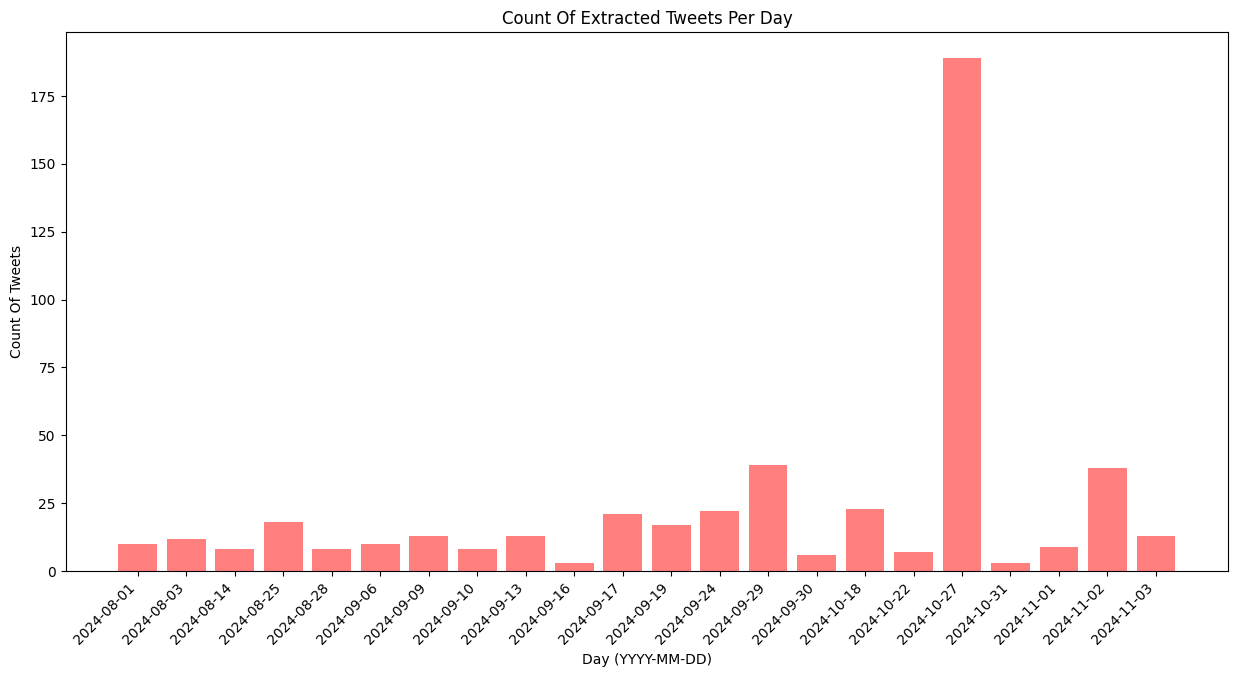

In [57]:
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict

# Aggregate tweet counts by day
daily_counts = defaultdict(int)  # Changed 'monthly_counts' to 'daily_counts'
for date, count in no_of_days.items():  # 'no_of_days' should already be a Counter object

    # Assuming all tweets are from the current year, you can change if necessary
    # date_str = datetime(2025, 3, date).strftime("%Y-%m-%d")
    date_str = df['created_at'][date].strftime("%Y-%m-%d")
    # Extract month and year (mm/yyyy format)
    # month_year = datetime.strptime(date_str, "%Y-%m-%d").strftime("%m/%Y")
    daily_counts[date_str] += count

# Sort months in chronological order
sorted_days = sorted(daily_counts.keys(), key=lambda x: datetime.strptime(x, "%Y-%m-%d"))

# Prepare x-axis labels and tweet counts
# months = sorted_months
days = sorted_days
tweet_counts = [daily_counts[day] for day in days]

# Create the bar chart
fig = plt.figure(figsize=(15, 7))
plt.bar(range(len(days)), tweet_counts, align='center', alpha=0.5, color='red')

# Set x-ticks to the formatted months
plt.xticks(range(len(days)), days, rotation=45, ha='right')  # Rotated x-axis labels for better visibility

# Set axis labels and title
plt.xlabel("Day (YYYY-MM-DD)")  # Changed label to "Day"
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets Per Day")  # Changed title to "Per Day"

# Show the plot
plt.show()

**Sentiment Analysis**

In [58]:
from textblob import TextBlob

In [59]:
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)

In [60]:
len(pol)

490

In [61]:
len(text)

9661

In [62]:
df['Processed_Tweet']

,Processed_Tweet
0,[trump]
1,[]
2,"[recent, poll, show, donald, trump, win, lands..."
3,"[trump, follow, back]"
4,"[ever, mag, ##a, trump]"
...,...
485,"[note, ##ne, ##p, test, result, upcom, novemb,..."
486,"[presidenti, elect, winner, donald, trump, kam..."
487,"[presidenti, elect, winner, donald, trump, kam..."
488,"[detroit, kamal, ##a, harri, donald, trump, ma..."


In [63]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 349
Negative Tweets: 23
Neutral Tweets 118


In [64]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [65]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])

In [66]:
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))

In [67]:
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.000,1.000,0.000,0.0000
1,0.000,0.000,0.000,0.0000
2,0.000,0.519,0.481,0.7579
3,0.000,1.000,0.000,0.0000
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
485,0.000,0.906,0.094,0.4588
486,0.000,0.648,0.352,0.5859
487,0.000,0.648,0.352,0.5859
488,0.000,1.000,0.000,0.0000


In [68]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.0,1.000,0.000,0.0000,Neutral
1,0.0,0.000,0.000,0.0000,Neutral
2,0.0,0.519,0.481,0.7579,Positive
3,0.0,1.000,0.000,0.0000,Neutral
4,0.0,1.000,0.000,0.0000,Neutral


<Axes: xlabel='sentiment', ylabel='count'>

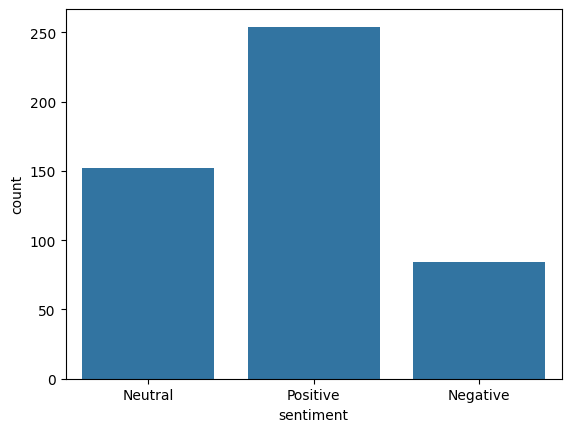

In [69]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)

In [71]:
filepath = r"/content/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)
len(emolex_df)

141775

In [72]:
emotions={'positive':0, 'negative':0, 'surprise':0,'sadness':0,
          'anger':0,'joy':0,'negative':0,'trust':0,'fear':0,'anticipation':0,'disgust':0}

In [73]:
word_emotion=dict()
for i in range(0,86343):
    emotion=emolex_df['emotion'][i]
    word=emolex_df['word'][i]
    association=emolex_df['association'][i]

    if word not in word_emotion:
        word_emotion[word]=dict()
    word_emotion[word][emotion]=association

In [74]:
for i in range(0,len(df)): # Change the loop range to iterate over the length of the DataFrame
    text=df['full_text'][i]
    for j in text.split():
        if j in word_emotion:
            for k in word_emotion[j]:
                emotions[k]+=word_emotion[j][k]
emotions

{'positive': 165,
 'negative': 111,
 'surprise': 34,
 'sadness': 55,
 'anger': 62,
 'joy': 47,
 'trust': 93,
 'fear': 62,
 'anticipation': 64,
 'disgust': 46}

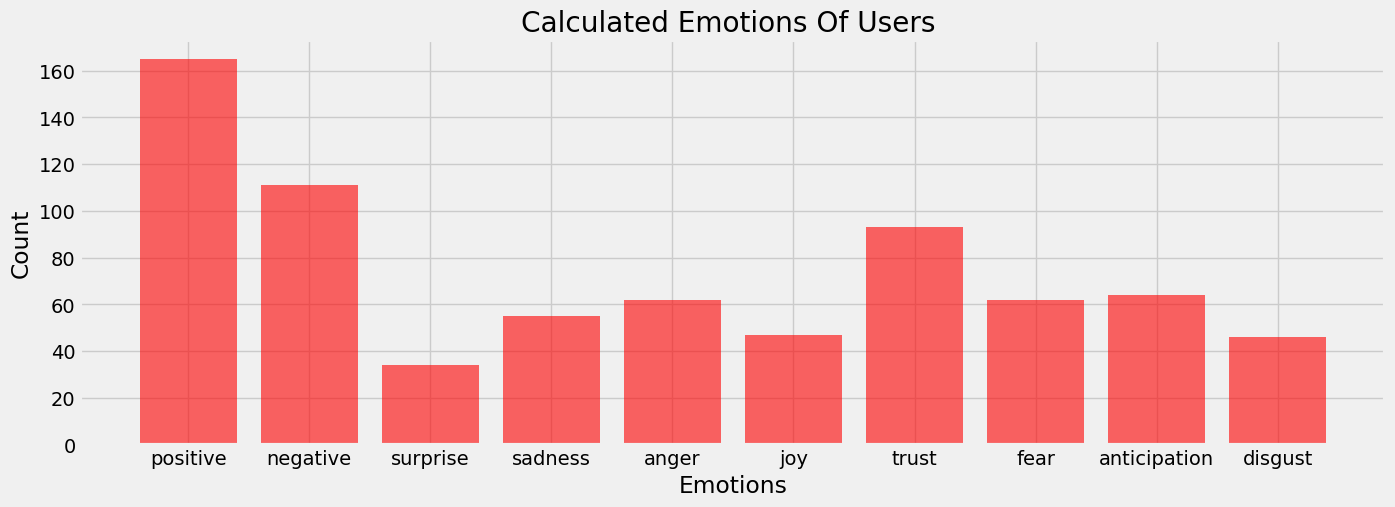

In [75]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(list(emotions.keys()),list(emotions.values()),color='red',alpha = 0.6)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Calculated Emotions Of Users ')
plt.show()

In [76]:
df1 = df

In [77]:
df1['sentiment'] = sentimental_score_df['val']

In [78]:
df1.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,Processed_Tweet,sentiment
0,1833973370460815785,2024-09-11 20:58:19+00:00,288,TRUMP 2024 🇺🇸🇺🇸 @LadyConstance8 @NancyMar2022 ...,1833973370460815785,https://pbs.twimg.com/media/GXOVD0cXYAAl3D_.jpg,NaN,en,NaN,6,47,168,https://x.com/Langer424/status/183397337046081...,1521692036897902592,Langer424,[trump],Neutral
1,1840195818198052940,2024-09-29 01:04:06+00:00,345,⭐️ The 𝘈𝘮𝘦𝘳𝘪𝘤𝘢𝘯 𝘴𝘱𝘪𝘳𝘪𝘵 𝘪𝘴 𝙂𝙍𝙀𝘼𝙏! ⭐️ 𝘈𝘮𝘦𝘳𝘪𝘤𝘢𝘯 𝘤...,1840195818198052940,https://pbs.twimg.com/amplify_video_thumb/1840...,NaN,en,The Great Lakes State,4,6,238,https://x.com/1776Diva/status/1840195818198052940,1343367645748473856,1776Diva,[],Neutral
2,1836786753765519766,2024-09-19 15:17:42+00:00,4464,Recent Poll shows Donald Trump WINNING IN A LA...,1836786753765519766,https://pbs.twimg.com/media/GX2TzpvX0AADuiW.jpg,NaN,en,India🇮🇳,44,1218,816,https://x.com/SUBRATA30016572/status/183678675...,1142736007567069184,SUBRATA30016572,"[recent, poll, show, donald, trump, win, lands...",Positive
3,1850662507481792623,2024-10-27 22:15:26+00:00,723,@realDonaldTrump With Trump in 2024? Here s a ...,1850662617917858188,https://pbs.twimg.com/media/Ga7f13qWcAEgvoP.jpg,realDonaldTrump,en,NaN,4,67,97,https://x.com/TuckerCarlsonHQ/status/185066261...,1755191109574107136,TuckerCarlsonHQ,"[trump, follow, back]",Neutral
4,1847203688097407237,2024-10-18 09:10:53+00:00,494,NOW more than EVER MAGA 🇺🇸 TRUMP 2024 https://...,1847203688097407237,https://pbs.twimg.com/media/GaKV9p7XgAAaeJF.jpg,NaN,en,NaN,1,25,212,https://x.com/DameScorpio/status/1847203688097...,1551523351843192834,DameScorpio,"[ever, mag, ##a, trump]",Neutral


In [79]:
!pip install pandas

import pandas as pd

# Convert 'created_at' column to datetime if it's not already
df['created_at'] = pd.to_datetime(df['created_at'])

# Extract the day from the 'created_at' column
df1['day'] = df['created_at'].dt.day

df1.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,Processed_Tweet,sentiment,day
0,1833973370460815785,2024-09-11 20:58:19+00:00,288,TRUMP 2024 🇺🇸🇺🇸 @LadyConstance8 @NancyMar2022 ...,1833973370460815785,https://pbs.twimg.com/media/GXOVD0cXYAAl3D_.jpg,NaN,en,NaN,6,47,168,https://x.com/Langer424/status/183397337046081...,1521692036897902592,Langer424,[trump],Neutral,11
1,1840195818198052940,2024-09-29 01:04:06+00:00,345,⭐️ The 𝘈𝘮𝘦𝘳𝘪𝘤𝘢𝘯 𝘴𝘱𝘪𝘳𝘪𝘵 𝘪𝘴 𝙂𝙍𝙀𝘼𝙏! ⭐️ 𝘈𝘮𝘦𝘳𝘪𝘤𝘢𝘯 𝘤...,1840195818198052940,https://pbs.twimg.com/amplify_video_thumb/1840...,NaN,en,The Great Lakes State,4,6,238,https://x.com/1776Diva/status/1840195818198052940,1343367645748473856,1776Diva,[],Neutral,29
2,1836786753765519766,2024-09-19 15:17:42+00:00,4464,Recent Poll shows Donald Trump WINNING IN A LA...,1836786753765519766,https://pbs.twimg.com/media/GX2TzpvX0AADuiW.jpg,NaN,en,India🇮🇳,44,1218,816,https://x.com/SUBRATA30016572/status/183678675...,1142736007567069184,SUBRATA30016572,"[recent, poll, show, donald, trump, win, lands...",Positive,19
3,1850662507481792623,2024-10-27 22:15:26+00:00,723,@realDonaldTrump With Trump in 2024? Here s a ...,1850662617917858188,https://pbs.twimg.com/media/Ga7f13qWcAEgvoP.jpg,realDonaldTrump,en,NaN,4,67,97,https://x.com/TuckerCarlsonHQ/status/185066261...,1755191109574107136,TuckerCarlsonHQ,"[trump, follow, back]",Neutral,27
4,1847203688097407237,2024-10-18 09:10:53+00:00,494,NOW more than EVER MAGA 🇺🇸 TRUMP 2024 https://...,1847203688097407237,https://pbs.twimg.com/media/GaKV9p7XgAAaeJF.jpg,NaN,en,NaN,1,25,212,https://x.com/DameScorpio/status/1847203688097...,1551523351843192834,DameScorpio,"[ever, mag, ##a, trump]",Neutral,18


<Axes: xlabel='day', ylabel='count'>

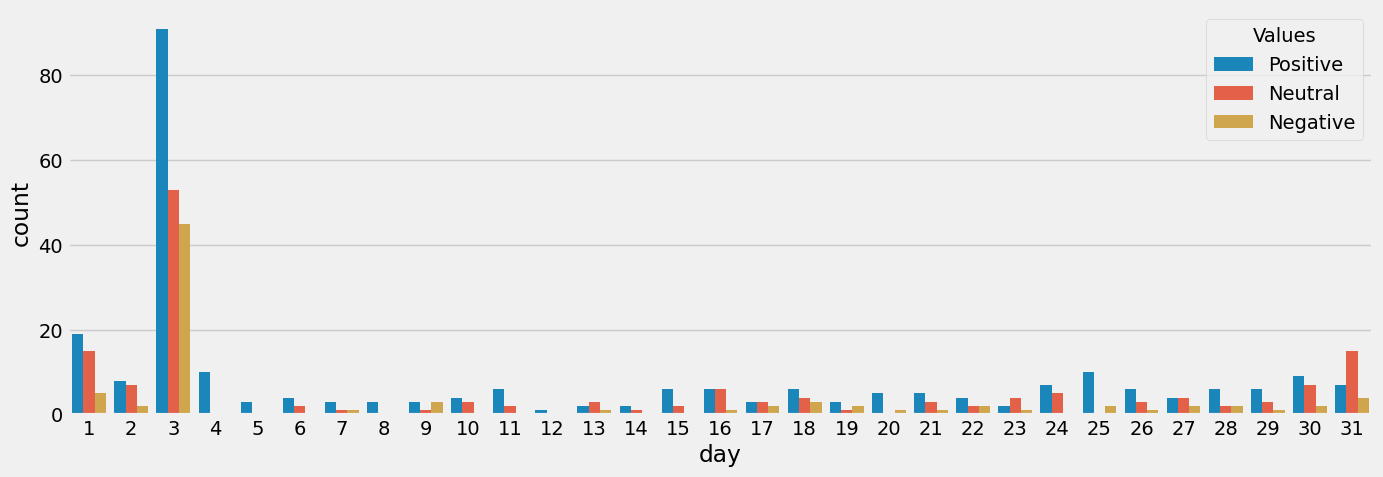

In [80]:
import pandas as pd
import seaborn as sns

# Assuming df1 contains both 'day' and 'sentiment' columns
# Melt the DataFrame to convert it to long-form
df_melted = pd.melt(df1, id_vars=['day'], value_vars=['sentiment'], var_name='Sentiment', value_name='Values')

# Now use the melted DataFrame for the countplot
sns.countplot(x='day', hue='Values', data=df_melted)

**Predicting using Machine Learning Model**

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [82]:
le = LabelEncoder()

df1['sentiment_1']= le.fit_transform(df1['sentiment'])

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Defining the vectorizer
vect = TfidfVectorizer(ngram_range=(1,1), max_features=1500).fit(all_words)

# Transform the vectorizer
X_tfidf = vect.transform(all_words).toarray()

In [84]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(all_words).toarray()
y = df1['sentiment_1']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# NEGATIVE == 0
# NEUTRAL == 1
# POSITIVE == 2

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state = 0)

**Decision Tree**

In [87]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [88]:
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
precision_score_DT = precision_score(y_test, y_pred_DT , average = 'micro')
recall_score_DT = recall_score(y_test, y_pred_DT , average = 'micro')
f1_score_DT = f1_score(y_test, y_pred_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_DT)
print("Precision Score: " , precision_score_DT)
print("Recall Score: " , recall_score_DT)
print("F1 Score: " , f1_score_DT)

Accuracy Score:  0.5578231292517006
Precision Score:  0.5578231292517006
Recall Score:  0.5578231292517006
F1 Score:  0.5578231292517006


In [89]:
cm_DT = confusion_matrix(y_test, y_pred_DT)


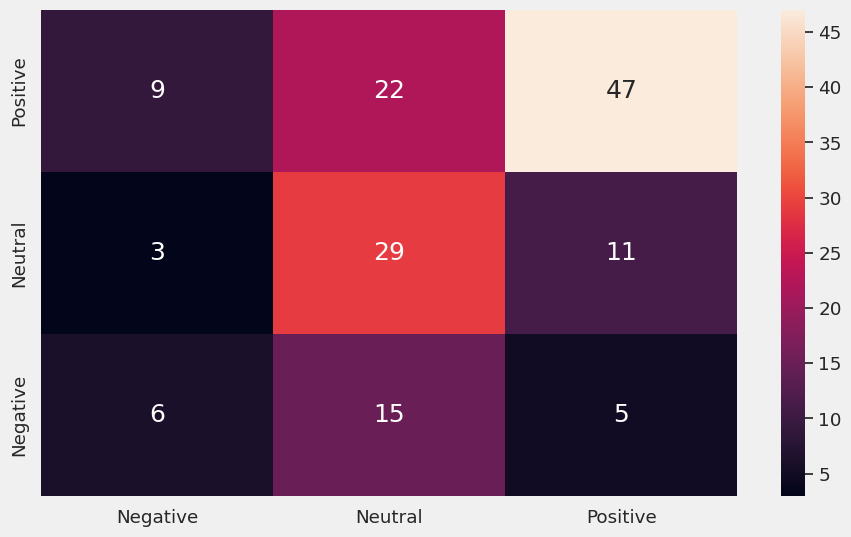

In [90]:
df_cm_DT = pd.DataFrame(cm_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

**Hyperparameter Tuning for Decision Tree**

In [91]:
#Getting the parameters of the particular model
classifier_DT.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'random_state', 'splitter'])

In [92]:
classifier_DT_opti = DecisionTreeClassifier()

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [93]:
model_DT = model_selection.GridSearchCV(estimator=classifier_DT_opti, #GridSearch
                                    param_grid=param_grid,
                                        cv=10)
model_DT.fit(X_train,y_train)
print(model_DT.best_score_) #Gives the best score of the model
print(model_DT.best_estimator_.get_params()) #Gives the best parameters

0.6178151260504203
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [94]:
y_pred_model_DT = model_DT.predict(X_test)

accuracy_score_model_DT = accuracy_score(y_test, y_pred_model_DT)
precision_score_model_DT = precision_score(y_test, y_pred_model_DT , average = 'micro')
recall_score_model_DT = recall_score(y_test, y_pred_model_DT , average = 'micro')
f1_score_model_DT = f1_score(y_test, y_pred_model_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_DT)
print("Precision Score: " , precision_score_model_DT)
print("Recall Score: " , recall_score_model_DT)
print("F1 Score: " , f1_score_model_DT)

Accuracy Score:  0.6394557823129252
Precision Score:  0.6394557823129252
Recall Score:  0.6394557823129252
F1 Score:  0.6394557823129252


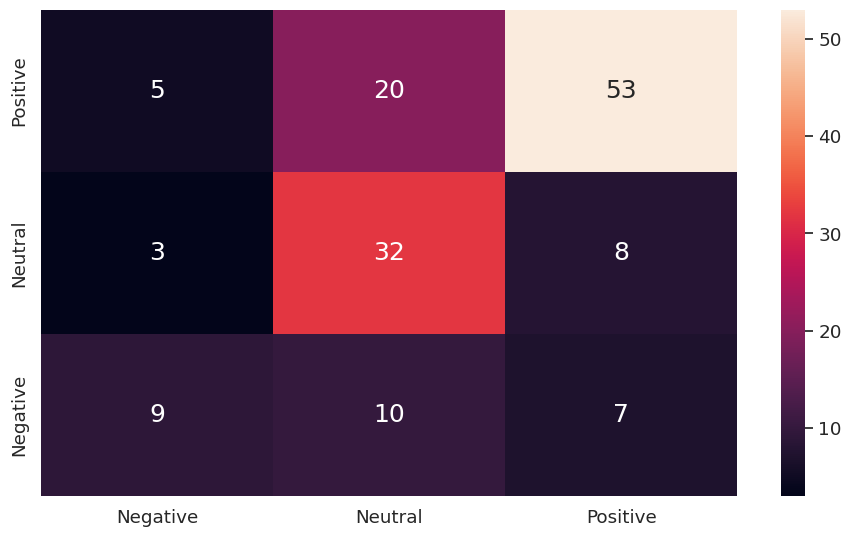

In [95]:
cm_model_DT = confusion_matrix(y_test, y_pred_model_DT)

df_cm_model_DT = pd.DataFrame(cm_model_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

**Random Forest**

In [96]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [97]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
precision_score_RF = precision_score(y_test, y_pred_RF , average = 'micro')
recall_score_RF = recall_score(y_test, y_pred_RF, average = 'micro')
f1_score_RF = f1_score(y_test, y_pred_RF, average = 'micro')
print("Accuracy Score: " , accuracy_score_RF)
print("Precision Score: " , precision_score_RF)
print("Recall Score: " , recall_score_RF)
print("F1 Score: " , f1_score_RF)

Accuracy Score:  0.6462585034013606
Precision Score:  0.6462585034013606
Recall Score:  0.6462585034013606
F1 Score:  0.6462585034013606


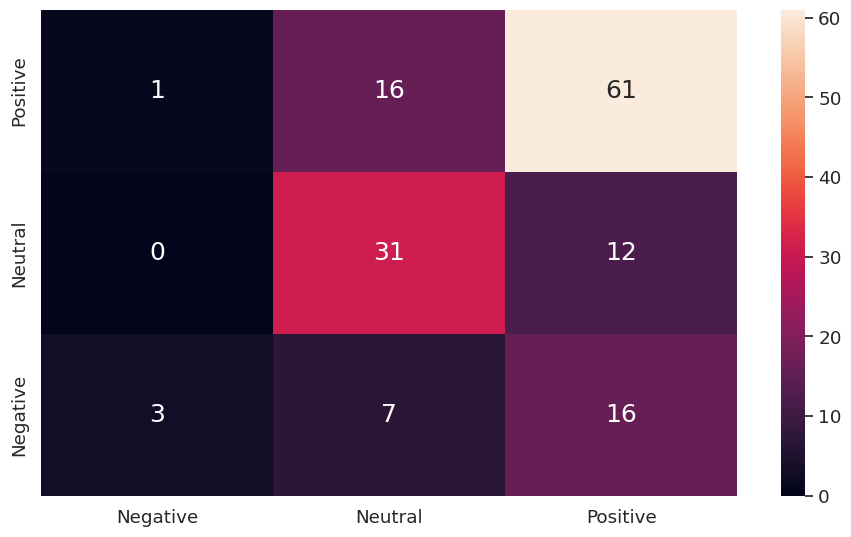

In [98]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

df_cm_RF = pd.DataFrame(cm_RF, range(3), range(3))
categories = ['Negative','Neutral','Positive']
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

**Hyperparameter tuning for Random Forest**

In [99]:
#Getting the parameters of the particular model
classifier_RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [100]:
classifier_RF_opti = RandomForestClassifier()
param_grid = {"n_estimators": np.arange(100,1500,100), #Selecting the parameters
               "max_depth": np.arange(1,20),
               "criterion": ["gini","entropy"],
              }

In [101]:
classifier_model_RF = model_selection.RandomizedSearchCV(estimator=classifier_RF_opti, #RandomizedSearch
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    scoring='accuracy',
                                    verbose=10,
                                    n_jobs=1,
                                    cv=5)

classifier_model_RF.fit(X_train,y_train)
print(classifier_model_RF.best_score_) #Gives the best score of the model
print(classifier_model_RF.best_estimator_.get_params()) #Gives the best parameters of the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START criterion=gini, max_depth=2, n_estimators=200..............
[CV 1/5; 1/10] END criterion=gini, max_depth=2, n_estimators=200;, score=0.522 total time=   0.9s
[CV 2/5; 1/10] START criterion=gini, max_depth=2, n_estimators=200..............
[CV 2/5; 1/10] END criterion=gini, max_depth=2, n_estimators=200;, score=0.507 total time=   1.3s
[CV 3/5; 1/10] START criterion=gini, max_depth=2, n_estimators=200..............
[CV 3/5; 1/10] END criterion=gini, max_depth=2, n_estimators=200;, score=0.507 total time=   1.3s
[CV 4/5; 1/10] START criterion=gini, max_depth=2, n_estimators=200..............
[CV 4/5; 1/10] END criterion=gini, max_depth=2, n_estimators=200;, score=0.515 total time=   1.9s
[CV 5/5; 1/10] START criterion=gini, max_depth=2, n_estimators=200..............
[CV 5/5; 1/10] END criterion=gini, max_depth=2, n_estimators=200;, score=0.515 total time=   1.2s
[CV 1/5; 2/10] START criterion=gini, max_dep

In [102]:
y_pred_model_RF = classifier_model_RF.predict(X_test)

accuracy_score_model_RF = accuracy_score(y_test, y_pred_model_RF)
precision_score_model_RF = precision_score(y_test, y_pred_model_RF , average = 'micro')
recall_score_model_RF = recall_score(y_test, y_pred_model_RF , average = 'micro')
f1_score_model_RF = f1_score(y_test, y_pred_model_RF , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_RF)
print("Precision Score: " , precision_score_model_RF)
print("Recall Score: " , recall_score_model_RF)
print("F1 Score: " , f1_score_model_RF)

Accuracy Score:  0.5918367346938775
Precision Score:  0.5918367346938775
Recall Score:  0.5918367346938775
F1 Score:  0.5918367346938775


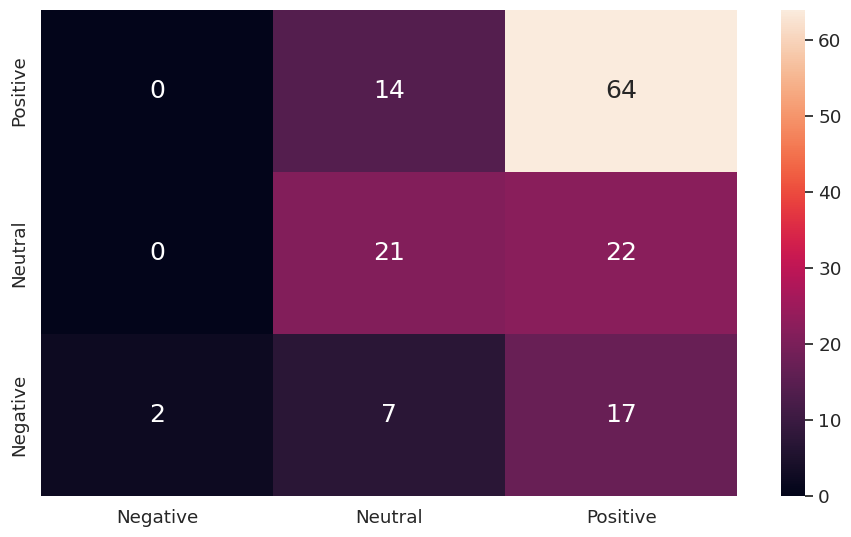

In [103]:
cm_model_RF = confusion_matrix(y_test, y_pred_model_RF)

df_cm_model_RF = pd.DataFrame(cm_model_RF, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

**Model Comparison**

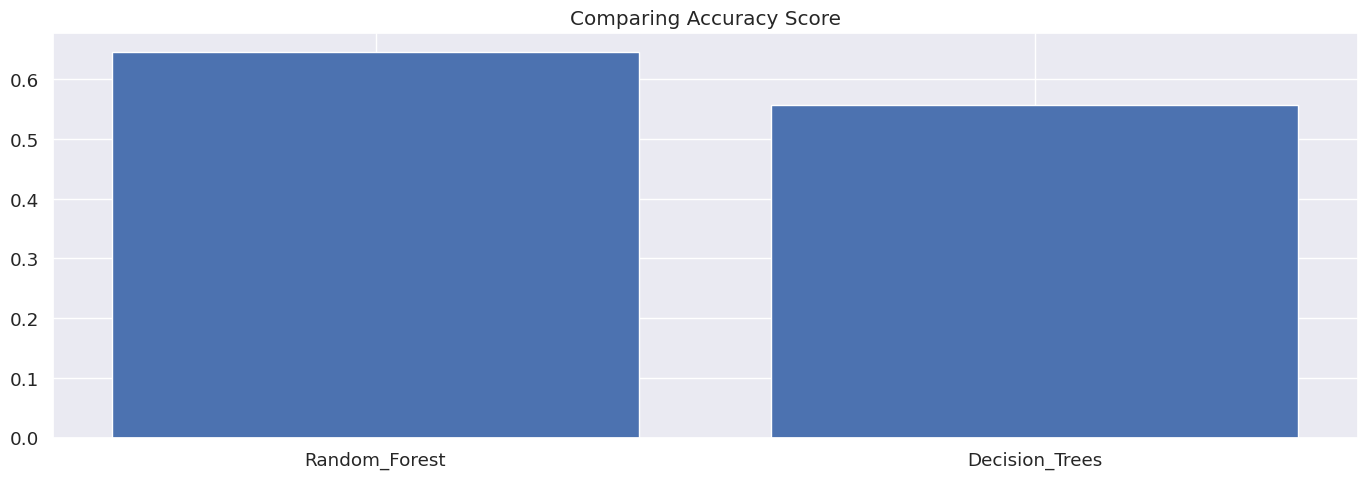

In [104]:
Accuracy = [accuracy_score_RF, accuracy_score_DT]
Methods = ['Random_Forest', 'Decision_Trees']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing Accuracy Score')
plt.show()

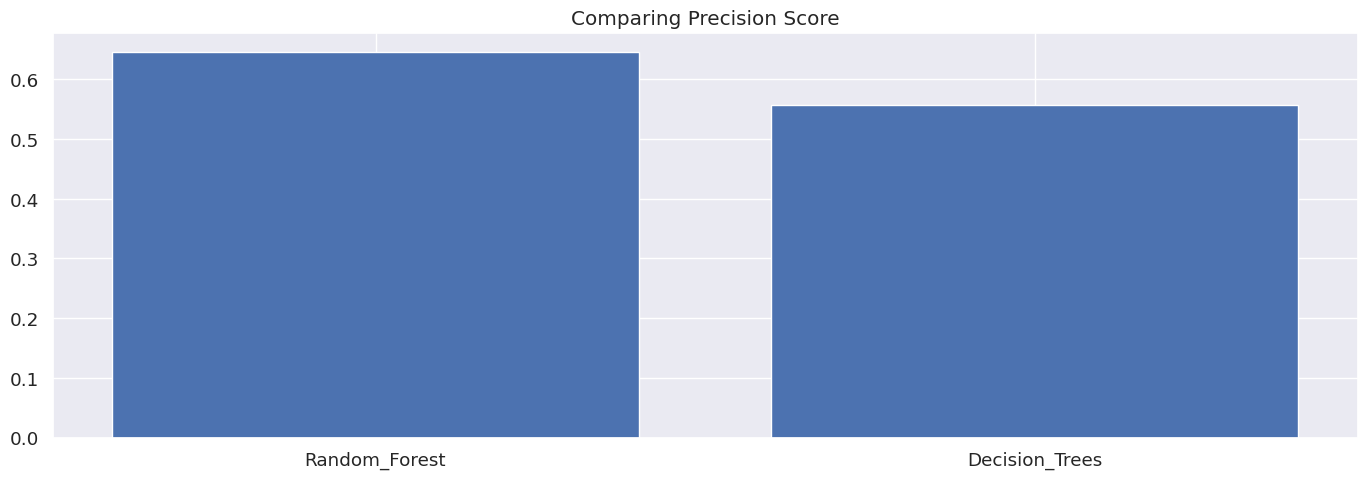

In [105]:
Precision = [precision_score_RF, precision_score_DT]
Methods = ['Random_Forest', 'Decision_Trees']
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('Comparing Precision Score')
plt.show()

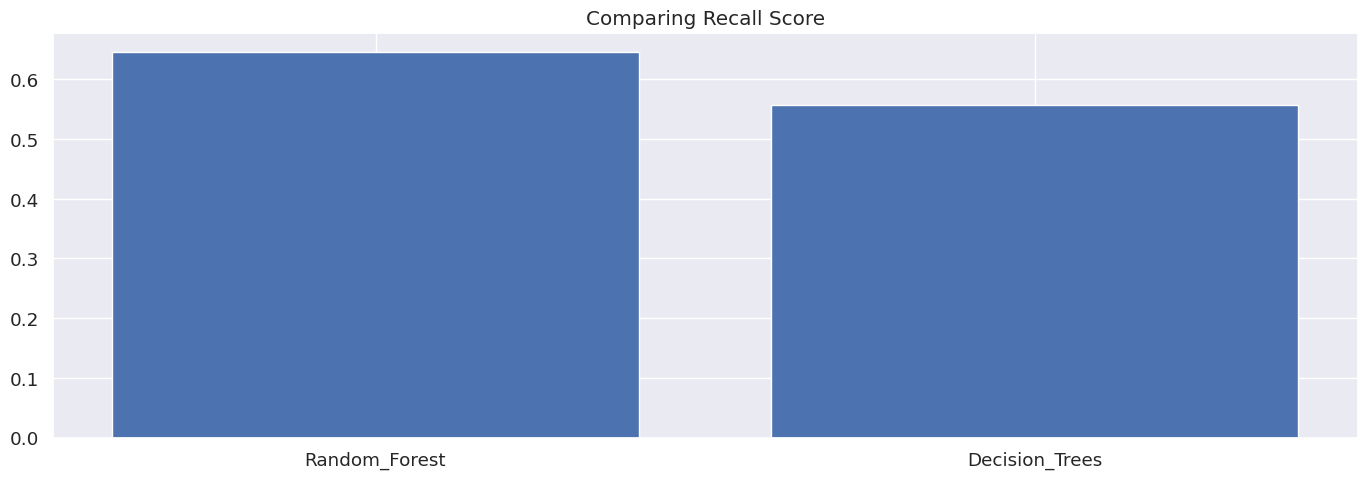

In [106]:
Recall = [recall_score_RF, recall_score_DT]
Methods = ['Random_Forest', 'Decision_Trees']
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('Comparing Recall Score')
plt.show()

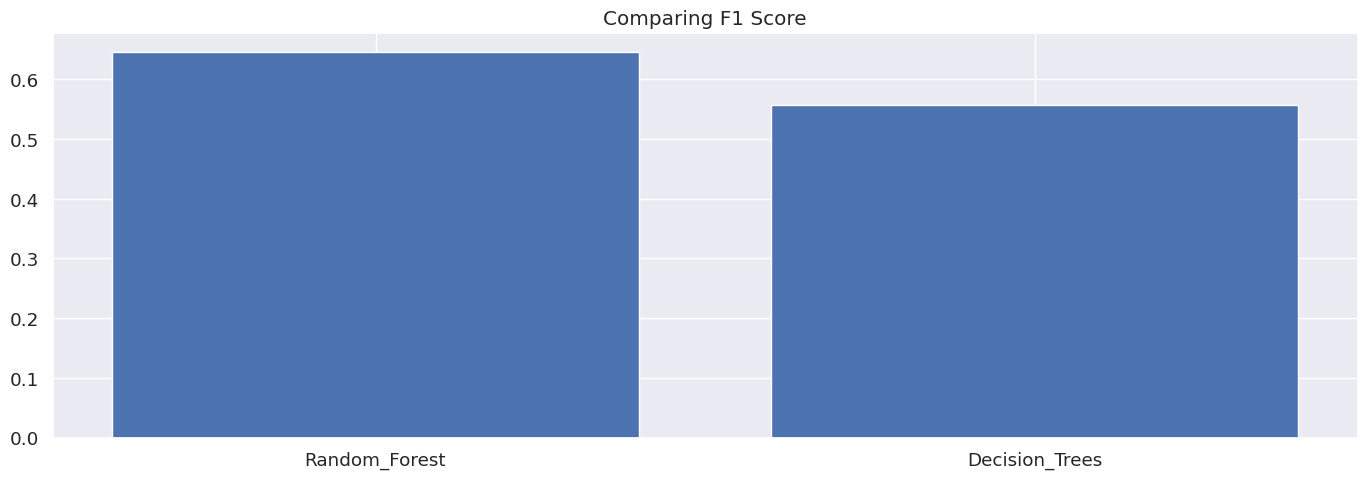

In [107]:
F1 = [f1_score_RF,f1_score_DT]
Methods = ['Random_Forest', 'Decision_Trees']
F1_pos = np.arange(len(Methods))
plt.bar(F1_pos, F1)
plt.xticks(F1_pos, Methods)
plt.title('Comparing F1 Score')
plt.show()